# Importing libraries

In [605]:
import pandas as pd
import regex as re
import emoji
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
!pip install gensim
!pip install pyLDAvis
!pip install pyLDAvis.gensim
!pip install language_detector
!pip install langdetect
import os
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
from langdetect import detect

# Displaying the dataset

In [604]:
tweet = pd.read_csv('./tweets_data.csv')
tweetset = pd.DataFrame()
tweetset['Column'] = tweet['0']
tweetset = pd.DataFrame(tweetset)

In [595]:
tweetset

,Column
0,# metoo
1,i too have been a victim of sexual harrassment...
2,@ realjameswoods @ twitter elizabeth perkins c...
3,elizabeth perkins names james woods during mar...
4,the worst betrayal is trust betrayal 🌹 # metoo
...,...
17165,hi # metoo # beauty # weightloss # gastrobypas...
17166,@ tonyrobbins are you fulfilled right now tony...
17167,@ sharkbaittx73 @ gbrfnt oh geez # metoo even ...
17168,i stand with the # metoo movement and believe ...


# Text Cleaning

In the cleaner function, we remove numbers and special chracters. We remove tweets that are not in eglish

In [597]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = " ".join(tweet.split())
    tweet = re.sub("([^\x00-\x7F])+"," ",tweet)
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    return tweet

In [598]:
tweetset['Column'] = tweetset['Column'].map(lambda x: cleaner(x))

tweetset['detect'] = detect(str(tweetset['Column']))

for i in tweetset.detect:
    if i not in ('en'):
        tweetset.drop(i)

In [600]:
tweetset

,Column,detect
0,metoo,en
1,i too have been a victim of sexual harrassment...,en
2,@ realjameswoods @ twitter elizabeth perkins c...,en
3,elizabeth perkins names james woods during mar...,en
4,the worst betrayal is trust betrayal metoo,en
...,...,...
17165,hi metoo beauty weightloss gastrobypass f...,en
17166,@ tonyrobbins are you fulfilled right now tony...,en
17167,@ sharkbaittx73 @ gbrfnt oh geez metoo even h...,en
17168,i stand with the metoo movement and believe t...,en


In [601]:
tweetset.to_csv('./tweets.csv')

In [571]:
# we convert dataset to list
corpus=[]
a=[]
for i in range(len(tweetset['Column'])):
        a=tweetset['Column'][i]
        corpus.append(a)
        
corpus[0:10]

[' metoo',
 'i too have been a victim of sexual harrassment and like everyone else i am struggling to come to terms with what happened .  metoo',
 '@ realjameswoods @ twitter elizabeth perkins called out the actor james woods on sunday , holding a sign bearing the words   james woods  metoo   as she joined a los angeles march designed to raise awareness of sexual assault and sexual harassment , and to demonstrate solidarity with the victims .',
 'elizabeth perkins names james woods during march against sexual harassment !  jameswoods  metoo  sexualassault  rape',
 'the worst betrayal is trust betrayal    metoo',
 'we cannot leave farmworkers or any low - wage women workers out of the  metoo movement . read this beautiful letter of solidarity for the women of hollywood from alianza nacional de campesinas .',
 ' metoo',
 'actor @ realjameswoods outed by actress elizabeth perkins  metoo  meat14  pedophiles',
 '@ 3l3v3nth too many of us have had similar things happen to us , often more tha

In [574]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/var/folders/yd/dwdfnncj7g10ds7bnpksx5bc0000gn/T" will be used to save temporary dictionary and corpus.


In [575]:
list1 = ['f','k','r','ist','gmo','said','even','la','el','est','qu','gt','en','se','rt','via','en','l','que','n','un','las','es','con','por','para','et','al','el','si','a','q','w','e','r','t','y','i','o','p','s','g','h','j','k','l','z','x','c','v','b','n','m',':','/','(',')','?','|',";","]","[",".",'@',"&","-","!"]
stoplist = stopwords.words('english') + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference

2021-12-17 01:24:52,840 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-12-17 01:24:53,008 : INFO : adding document #10000 to Dictionary(24808 unique tokens: ['metoo', 'come', 'else', 'everyone', 'happened']...)
2021-12-17 01:24:53,148 : INFO : built Dictionary(37138 unique tokens: ['metoo', 'come', 'else', 'everyone', 'happened']...) from 17170 documents (total 248689 corpus positions)
2021-12-17 01:24:53,149 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(37138 unique tokens: ['metoo', 'come', 'else', 'everyone', 'happened']...) from 17170 documents (total 248689 corpus positions)", 'datetime': '2021-12-17T01:24:53.149506', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
2021-12-17 01:24:53,150 : INFO : Dictionary lifecycle event {'fname_or_handle': '/var/folders/yd/dwdfnncj7g10ds7bnpksx5bc0000gn/T/elon.dict', 'separately': 'None', 'sep_limit': 1

In [576]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'twitter.mm'), corpus)  # store to disk, for later use

2021-12-17 01:24:54,312 : INFO : storing corpus in Matrix Market format to /var/folders/yd/dwdfnncj7g10ds7bnpksx5bc0000gn/T/elon.mm
2021-12-17 01:24:54,313 : INFO : saving sparse matrix to /var/folders/yd/dwdfnncj7g10ds7bnpksx5bc0000gn/T/elon.mm
2021-12-17 01:24:54,314 : INFO : PROGRESS: saving document #0
2021-12-17 01:24:54,335 : INFO : PROGRESS: saving document #1000
2021-12-17 01:24:54,356 : INFO : PROGRESS: saving document #2000
2021-12-17 01:24:54,372 : INFO : PROGRESS: saving document #3000
2021-12-17 01:24:54,420 : INFO : PROGRESS: saving document #4000
2021-12-17 01:24:54,438 : INFO : PROGRESS: saving document #5000
2021-12-17 01:24:54,458 : INFO : PROGRESS: saving document #6000
2021-12-17 01:24:54,475 : INFO : PROGRESS: saving document #7000
2021-12-17 01:24:54,493 : INFO : PROGRESS: saving document #8000
2021-12-17 01:24:54,512 : INFO : PROGRESS: saving document #9000
2021-12-17 01:24:54,530 : INFO : PROGRESS: saving document #10000
2021-12-17 01:24:54,551 : INFO : PROGRESS

# Model for covarience matric heatmap

In [577]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

2021-12-17 01:24:55,144 : INFO : collecting document frequencies
2021-12-17 01:24:55,145 : INFO : PROGRESS: processing document #0
2021-12-17 01:24:55,175 : INFO : PROGRESS: processing document #10000
2021-12-17 01:24:55,279 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 17170 documents and 37138 features (225702 matrix non-zeros)', 'datetime': '2021-12-17T01:24:55.279712', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'initialize'}


In [578]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

In [579]:
total_topics = 5 #setting topics

In [580]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

2021-12-17 01:24:57,026 : INFO : using symmetric alpha at 0.2
2021-12-17 01:24:57,027 : INFO : using symmetric eta at 0.2
2021-12-17 01:24:57,035 : INFO : using serial LDA version on this node
2021-12-17 01:24:57,055 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 17170 documents, updating model once every 2000 documents, evaluating perplexity every 17170 documents, iterating 50x with a convergence threshold of 0.001000
2021-12-17 01:24:57,055 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-12-17 01:24:57,056 : INFO : PROGRESS: pass 0, at document #2000/17170
2021-12-17 01:24:57,808 : INFO : merging changes from 2000 documents into a model of 17170 documents
2021-12-17 01:24:57,826 : INFO : topic #0 (0.200): 0.075*"metoo" + 0.071*"@" + 0.026*"'" + 0.021*"," + 0.010*"-" + 0.009*""" + 0.009*"&" + 0.009*"amp" + 0.008*"women" + 0.008*"sexual"
2021-12-

In [582]:
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}

In [583]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(5, 76)


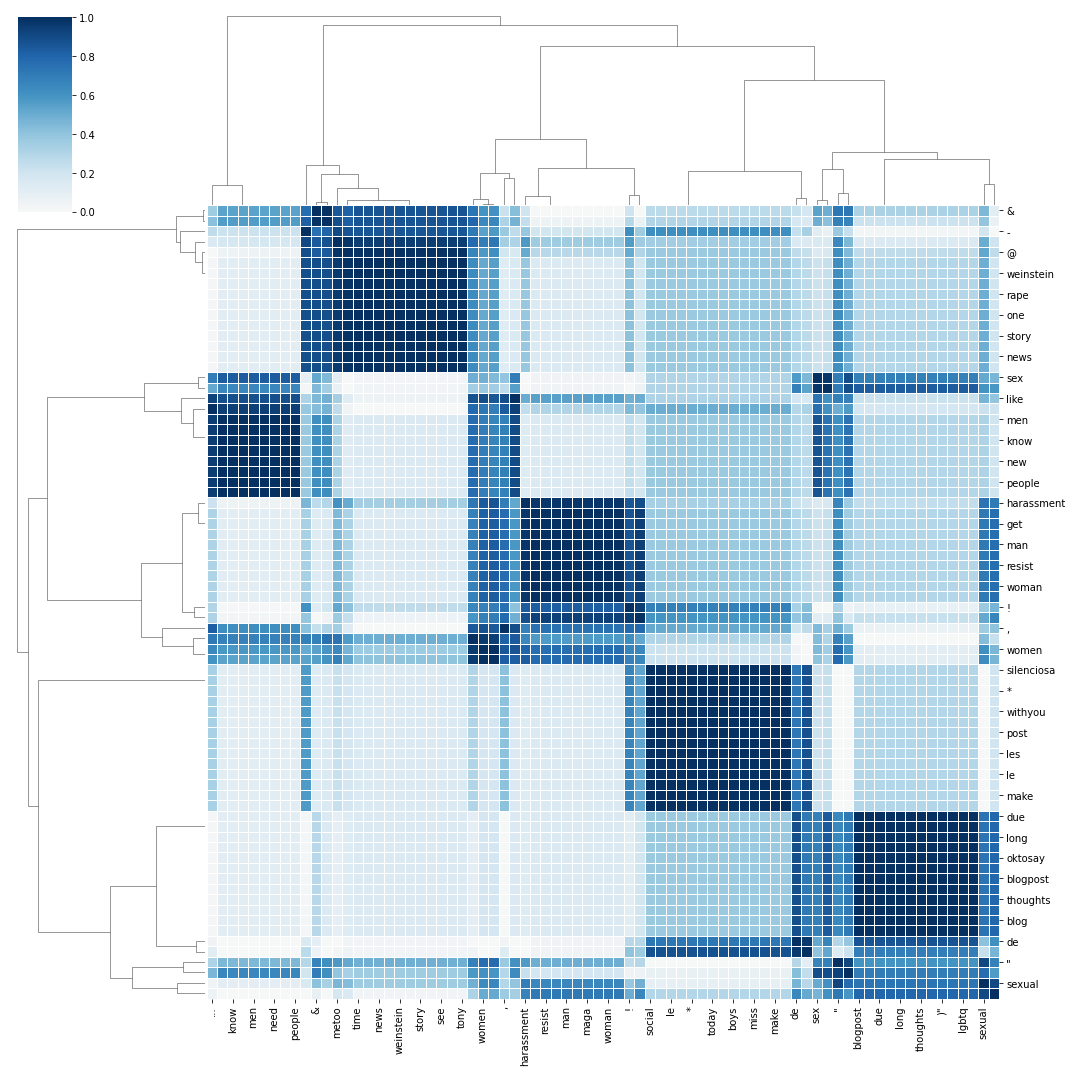

In [585]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()